In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr

In [61]:
x = np.array([2,4,5,3,6,5,7])
y = np.array([35,60,20,50,50,55,60])

## OLS Method

In [62]:

x_ = np.mean(x)
y_ = np.mean(y)

XY = np.sum((x-x_)*(y-y_))
X2 = np.sum((x-x_)**2)

m1 = XY/X2
c1 = y_ - m1*x_

(m1 ,c1)


(np.float64(2.620967741935484), np.float64(35.16129032258065))

In [63]:
pY1 = 6.5*m1 + c1
pY1

np.float64(52.197580645161295)

## Method 2

In [64]:
N = x.size
X = np.sum(x)
Y = np.sum(y)
X2 = np.sum(x**2)
XY = np.sum(x*y)

m2 = (N*XY -X*Y)/(N*X2-X**2)
c2 = y_ -m2*x_

(m2,c2)


(np.float64(2.620967741935484), np.float64(35.16129032258065))

In [65]:
pY2 = 6.5*m2 + c2
pY2

np.float64(52.197580645161295)

## Using sklearn

In [66]:
df = pd.read_csv('../data/Assignment-02.csv')
df.head()


,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [67]:
x = df[['Weight']]
y = df['Price']

model = lr().fit(x,y)

m = model.coef_
c = model.intercept_

(m,c)

(array([2.62096774]), np.float64(35.16129032258065))

## Error calculation

In [68]:
yp = df['Prediction'] = model.predict(x)
df['Error'] = y - yp
df

,Weight,Price,Prediction,Error
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [69]:
# MAE = df['Error'].abs().sum()
MAE = np.sum(df['Error'].abs())
MSE = np.sum(df['Error']**2)

(MAE, MSE)

(np.float64(69.11290322580643), np.float64(1171.1693548387095))

## Visualization 

C:\Users\tahme\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


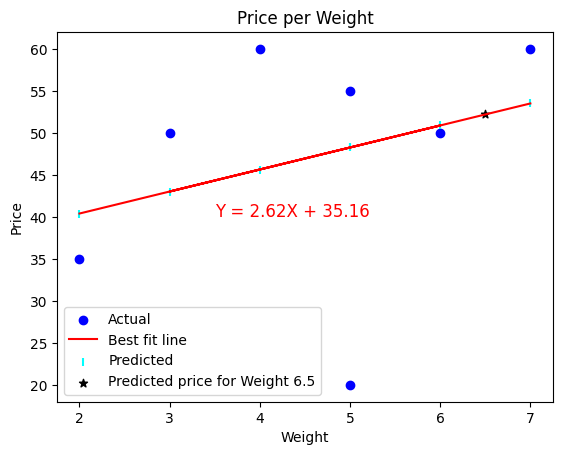

In [86]:
plt.scatter(df['Weight'], df['Price'], color='blue',label='Actual')

plt.plot(df['Weight'], df['Prediction'], color='red', label='Best fit line')

eq = f"Y = {m[0]:.2f}X + {c:.2f}"
plt.text(3.5, 40, eq, fontsize=12, color='red')

plt.scatter(df['Weight'], df['Prediction'], color='cyan', marker='|', label='Predicted')
plt.scatter(6.5, model.predict([[6.5]]), color='black', marker='*', label='Predicted price for Weight 6.5')

plt.xlabel('Weight')
plt.ylabel('Price')
plt.title("Price per Weight")
plt.legend()